In [1]:
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
import nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv(r'D:Orders/Subash/cleandf2.csv')

In [3]:
df

,user_location,user_created,user_followers,user_verified,text,hashtags,clean_text,Polarity,Sentiment
0,astroworld,5/26/2017 5:46,624,False,if i smelled the scent of hand sanitizers toda...,NaN,smelled scent hand sanitizers today someone pa...,-0.250000,0
1,"New York, NY",4/16/2009 20:06,2253,True,hey @yankees @yankeespr and @mlb - wouldn't it...,NaN,yankees yankeespr wouldn have made more sense ...,0.500000,1
2,"Pewee Valley, KY",2/28/2009 18:57,9275,False,@diane3443 @wdunlap @realdonaldtrump trump nev...,['COVID19'],diane wdunlap realdonaldtrump trump never once...,0.000000,0
3,Stuck in the Middle,3/7/2019 1:45,197,False,@brookbanktv the one gift #covid19 has give me...,['COVID19'],brookbanktv gift #covid give appreciation simp...,0.000000,0
4,Jammu and Kashmir,2/12/2017 6:45,101009,False,25 july : media bulletin on novel #coronavirus...,"['CoronaVirusUpdates', 'COVID19']",july media bulletin novel #coronavirusupdates ...,0.000000,0
...,...,...,...,...,...,...,...,...,...
177400,"Ilorin, Nigeria",12/30/2013 18:59,412,False,thanks @iamohmai for nominating me for the @wh...,['WearAMask'],thanks iamohmai nominating #wearamask challeng...,0.200000,1
177401,Ontario,12/21/2011 4:41,150,False,2020! the year of insanity! lol! #covid19 http...,['COVID19'],year insanity #covid yzgn,0.000000,0
177402,🇨🇦 Canada,7/13/2016 17:21,1623,False,@ctvnews a powerful painting by juan lucena. i...,NaN,ctvnews powerful painting juan lucena tribute ...,0.300000,1
177403,New York City,10/27/2009 17:43,1338,False,"more than 1,200 students test positive for #co...",['COVID19'],more than students test positive #covid major ...,0.263258,1


In [4]:
np.sum(df.isnull().any(axis=1))

76149

In [5]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [6]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['clean_text'] = df['clean_text'].apply(lambda text: cleaning_stopwords(text))


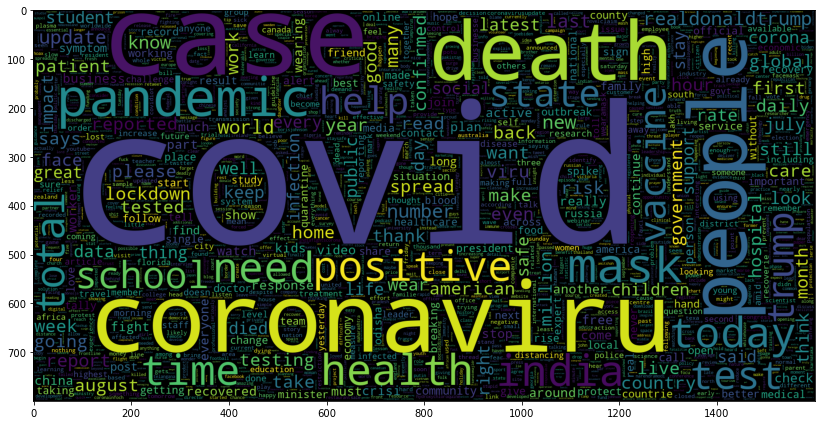

In [7]:
data_neg = df['clean_text']
plt.figure(figsize = (14,12))
wc = WordCloud(max_words = 10000, width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.savefig(r'D:Orders/Subash/total.png')
plt.imshow(wc)

In [8]:
a = df['clean_text'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
dff = pd.DataFrame(word_dist.most_common(), 
                    columns=['Word', 'Frequency'])
#dff['Word_Count'] = dff.Word.apply(len)
dff[:11]

,Word,Frequency
0,#,257706
1,covid,117424
2,cases,18155
3,coronavirus,14591
4,people,9538
5,pandemic,8512
6,deaths,7328
7,india,5563
8,health,5436
9,today,5326


In [9]:
X = df.clean_text
y = df.Sentiment

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, 
                                                    random_state =26105)

In [11]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  500000


In [12]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [13]:
def model_Evaluate(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['TN\n','FP\n', 'FN\n','TP\n']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix of Logistic Regression Model", fontdict = {'size':18}, pad = 20)



              precision    recall  f1-score   support

           0       0.81      0.98      0.89      5503
           1       0.95      0.63      0.76      3368

    accuracy                           0.85      8871
   macro avg       0.88      0.81      0.82      8871
weighted avg       0.87      0.85      0.84      8871



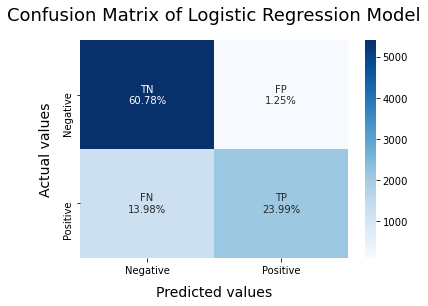

In [14]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

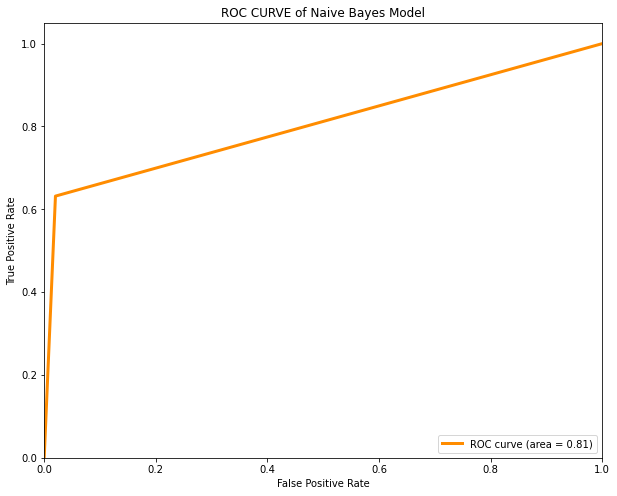

In [15]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=3, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE of Naive Bayes Model')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      5503
           1       0.95      0.91      0.93      3368

    accuracy                           0.95      8871
   macro avg       0.95      0.94      0.95      8871
weighted avg       0.95      0.95      0.95      8871



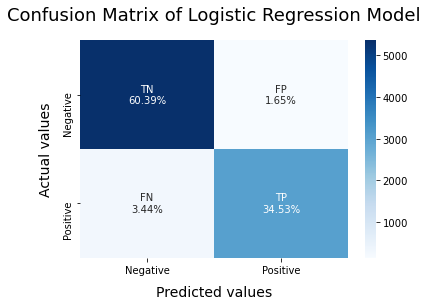

In [16]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

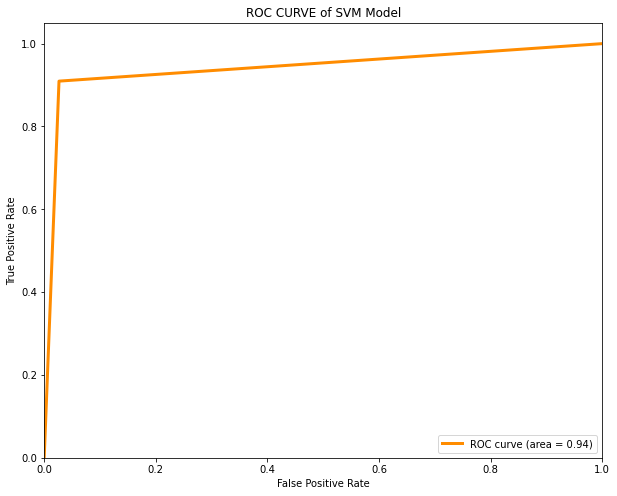

In [17]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=3, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE of SVM Model')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5503
           1       0.95      0.87      0.91      3368

    accuracy                           0.94      8871
   macro avg       0.94      0.92      0.93      8871
weighted avg       0.94      0.94      0.93      8871



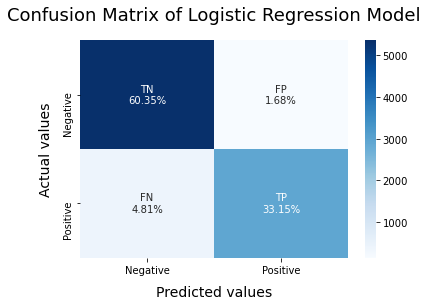

In [18]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

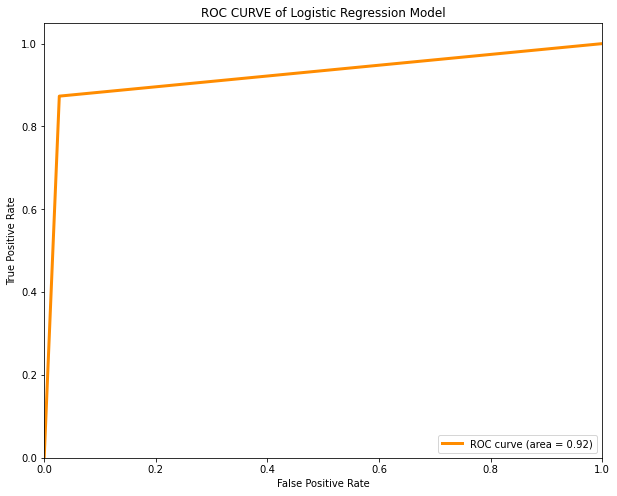

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure(figsize = (10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=3, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE of Logistic Regression Model')
plt.legend(loc="lower right")
plt.show()